In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
from scipy.io import wavfile
import scipy.signal
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

In [3]:
data, fs = sf.read('xvenge01.wav')
t = np.arange(data.size)/fs


inform = sf.info('xvenge01.wav')
frames = inform.frames
duration = inform.duration
print('Dlzka v sekundach: {} '.format(duration))
print('Dlzka v pocte vzorkov: {} '.format(frames))
print('Max hodnota: {}'.format(data.max()))
print('Min hodnota: {}'.format(data.min()))

Dlzka v sekundach: 4.7424375 
Dlzka v pocte vzorkov: 75879 
Max hodnota: 0.234771728515625
Min hodnota: -0.184295654296875


<IPython.core.display.Javascript object>


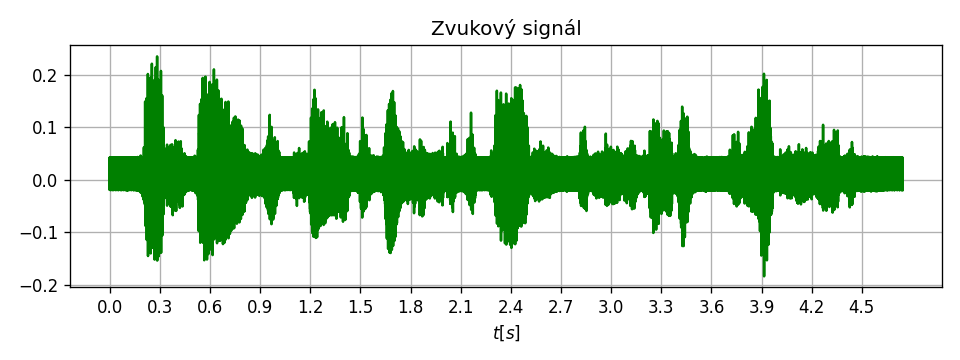

In [4]:
plt.figure(figsize=(8,3))
plt.plot(t, data, 'g-')

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')

plt.xticks(np.arange(0,max(t),0.3))
plt.tight_layout()
plt.grid(True)
#KONIEC ULOHY 1

In [5]:
n = 0
matrix = []
while (n + 1024) <= data.size:
    odkial = n
    pokial = n + 1024
    s_segm = data[odkial:pokial]
    matrix.append(s_segm)
    n = n + 512
    
data.size, data.size/1024, 147*512, frames, frames-(147*512), len(matrix)

(75879, 74.1005859375, 75264, 75879, 615, 147)

In [6]:
result = np.zeros((1024,int(data.size/512)))
#transpose aby boli podla zadania ulozene
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        result[j][i] = matrix[i][j]

<IPython.core.display.Javascript object>


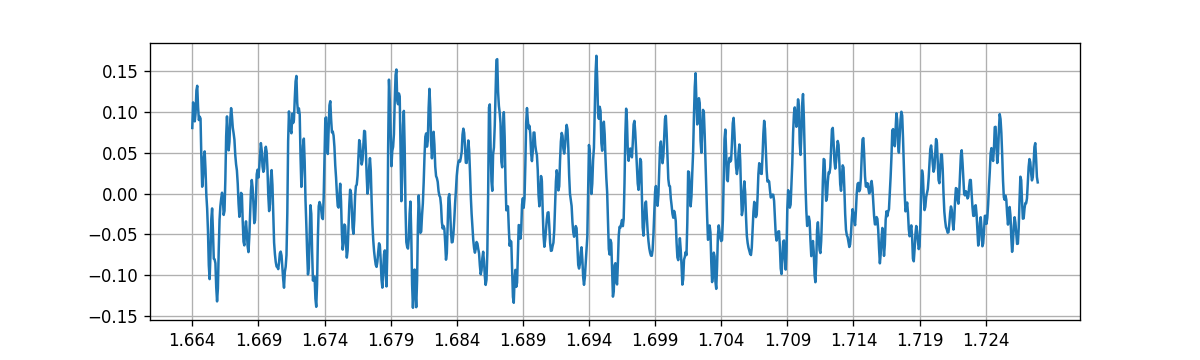

In [7]:
column = []
index = 52

for row in result:
  column.append(row[index])
m = index*512
#t = np.arange(data.size) / fs
plt.figure(figsize=(10,3))
plt.plot(t[m:m+1024], column)
plt.xticks(np.arange(t[m],t[m+1024],0.005))
plt.grid(True)
IPython.display.display(IPython.display.Audio(column, rate=fs))
#KONIEC ULOHY 2

In [8]:
#ULOHA 3
N = 1024
#vstup -> vstupny signal x
def my_dft(x):
    
    X = np.zeros(N,dtype=complex)
    for k in range(0,N):
        for n in range(0,N):
            X[k] = X[k] + x[n]*np.exp(-2j*np.pi*k*n/N)
    return X


In [9]:
x = column
X=my_dft(x)
X2 = np.fft.fft(x)
print('my_dft and np.fft.fft allclose: ',np.allclose(X - X2,1e-12))



my_dft and np.fft.fft allclose:  True


<IPython.core.display.Javascript object>


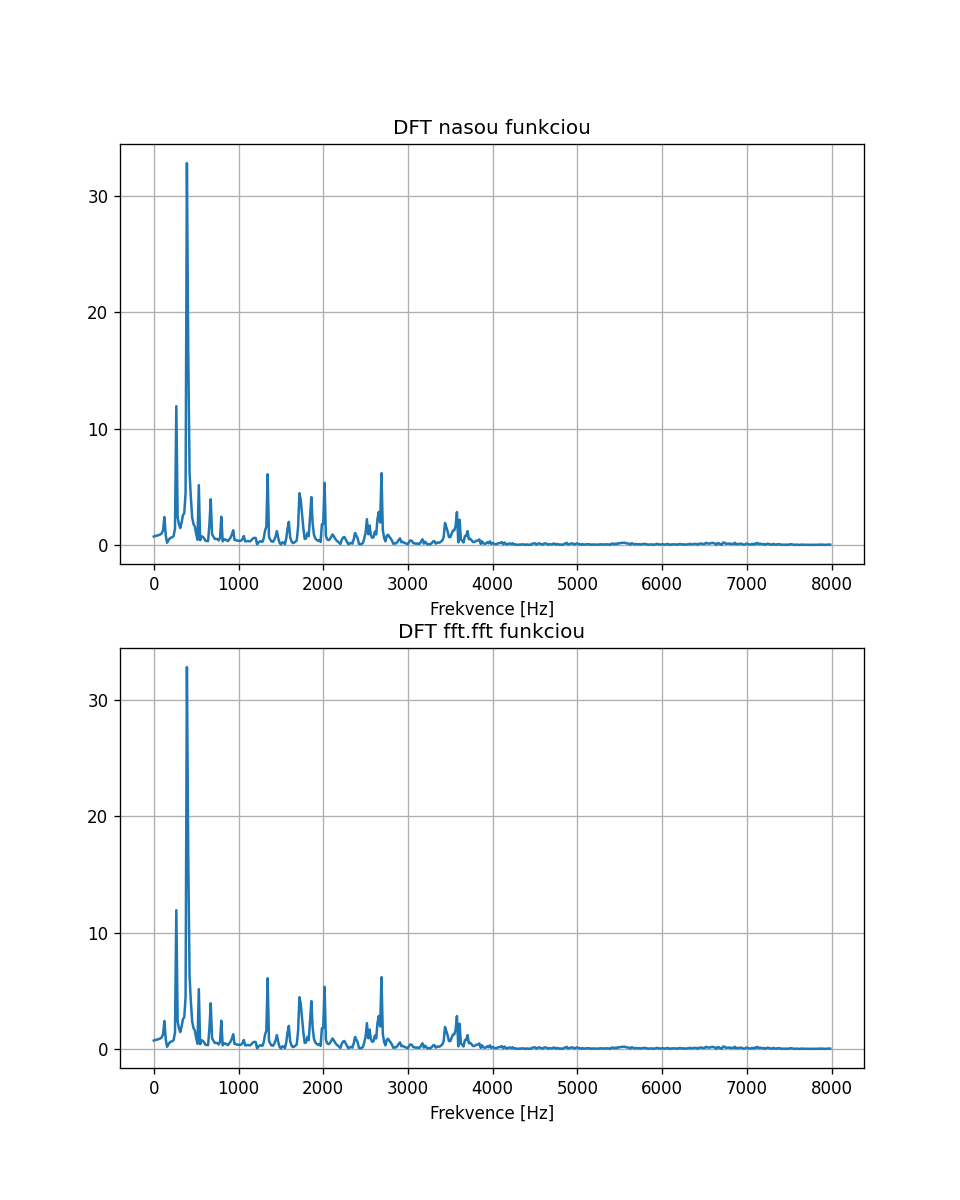

my_dft and np.fft.fft allclose:  True


In [10]:
k = np.zeros(N)
for m in range(0,N):
    k[m] = m/N*fs

N2=int(N/2)
k2 = np.zeros(N2)   
for m in range(0,N2):
    k2[m] = k[m]

mod_X = np.zeros(N2)
mod_X2 = np.zeros(N2)

# X
for m in range(0,N2):
    mod_X[m] = abs(X[m]) #nasa dft funkcia
    mod_X2[m] = abs(X2[m]) #vysledok z np kniznice
    
    
figure, axis = plt.subplots(2, 1,figsize=(8,10))
                                          
#plt.figure(figsize=(8,3))
axis[0].set_title("DFT nasou funkciou")
axis[0].set_yticks(np.arange(0,max(mod_X)+10,10.0))
axis[0].grid(True)
axis[0].plot(k2,mod_X)
axis[0].set_xlabel('Frekvence [Hz]')


   
axis[1].set_title("DFT fft.fft funkciou")
axis[1].set_yticks(np.arange(0,max(mod_X)+10,10.0))
axis[1].grid(True)
axis[1].plot(k2,mod_X2)
axis[1].set_xlabel('Frekvence [Hz]')


print('my_dft and np.fft.fft allclose: ',np.allclose(X - X2,1e-12))

In [11]:
#ULOHA 4, spektogram
f, t, sxx = spectrogram(data,nperseg=N, fs=fs, noverlap=512)
P = 10 * np.log10(pow(sxx,2)) 
# P = 10 * np.log10(sxx+1e-20) 

<IPython.core.display.Javascript object>


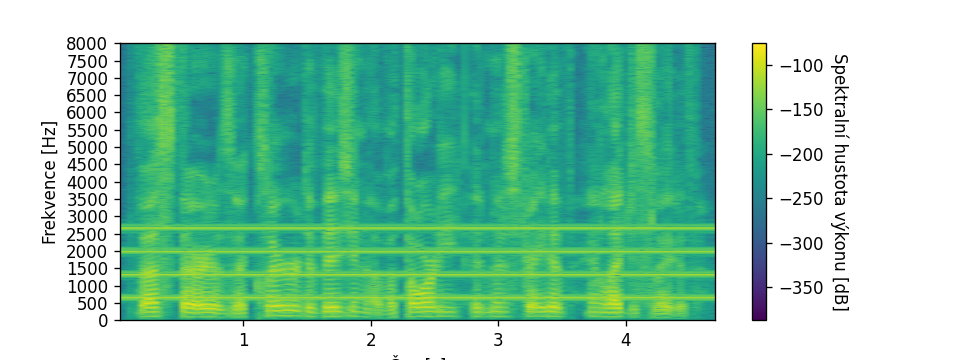

f2 => True
f3 => True
f4 => True


In [12]:
plt.figure(figsize=(8,3))
plt.yticks(np.arange(0,max(f)+1,500))
plt.pcolormesh(t,f,P,shading='gouraud')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')

cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)


#Uloha 5
#GRAFICKY zo spektra pri zhusteni y osi na krok 25 lahko odcitatelne
#675Hz, 1350Hz ,2025Hz, 2700Hz -> su nasobkami takze ok 
f1=675

f2=1350
print("f2 => {}".format(f2%f1==0))

f3=2025
print("f3 => {}".format(f3%f1==0))

f4=2700
print("f4 => {}".format(f4%f1==0))


In [13]:
#ULOHA 6
#mame 4 frekvencie, to su HZ potrebujeme kruhove -> om = 2*pi * fs
om1=2*np.pi*f1
om2=2*np.pi*f2
om3=2*np.pi*f3
om4=2*np.pi*f4

output_cos = np.zeros(frames)
for i in range(0,frames):
    output_cos[i] += np.cos(om1*i/fs)
    output_cos[i] += np.cos(om2*i/fs)
    output_cos[i] += np.cos(om3*i/fs)
    output_cos[i] += np.cos(om4*i/fs)
    

sf.write("cos4.wav",output_cos,fs)

<IPython.core.display.Javascript object>


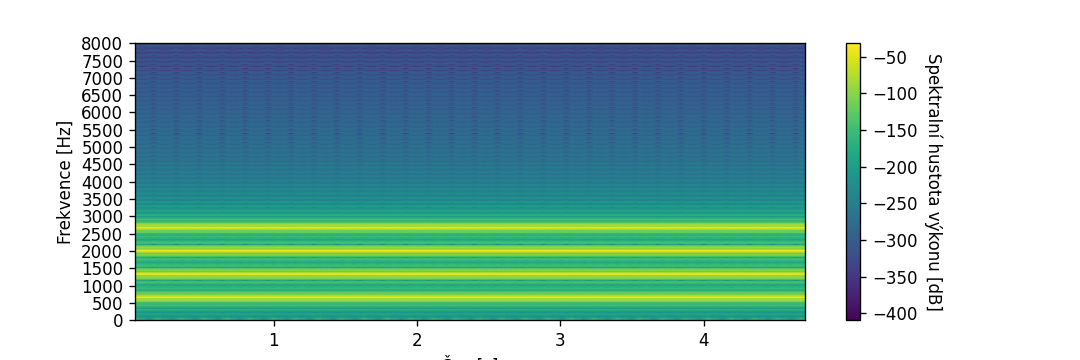

In [14]:
fo, to, sxxo = spectrogram(output_cos,nperseg=N, fs=fs, noverlap=512)
Po = 10 * np.log10(pow(sxxo,2)) 

plt.figure(figsize=(9,3))
plt.yticks(np.arange(0,max(fo)+1,500))
plt.pcolormesh(to,fo,Po,shading='gouraud')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')

cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)


In [15]:

Q=1

#filtre frekvencii urcenych v ulohe5
b,a = scipy.signal.iirnotch(f1,Q,fs)
b2,a2 = scipy.signal.iirnotch(f2,Q,fs)
b3,a3 = scipy.signal.iirnotch(f3,Q,fs)
b4,a4 = scipy.signal.iirnotch(f4,Q,fs)


#impulzne odozvy
N_imp = 32
imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls

h = lfilter(b, a, imp)
h2 = lfilter(b2, a2, imp)
h3 = lfilter(b3, a3, imp)
h4 = lfilter(b4, a4, imp)

#frekvencna charakteristika
w,H = scipy.signal.freqz(b,a,fs=fs)
w2, H2 = scipy.signal.freqz(b2,a2,fs=fs)
w3, H3 = scipy.signal.freqz(b3,a3,fs=fs)
w4, H4 = scipy.signal.freqz(b4,a4,fs=fs)

#nuly, poly
z, p, k = tf2zpk(b, a)
z2, p2, k = tf2zpk(b2, a2)
z3, p3, k = tf2zpk(b3, a3)
z4, p4, k = tf2zpk(b4, a4)


f = open("f1_b.txt", "w")
f.write(str(b))
f.close()

f = open("f1_a.txt", "w")
f.write(str(a))
f.close

f = open("f2_b.txt", "w")
f.write(str(b2))
f.close()

f = open("f2_a.txt", "w")
f.write(str(a2))
f.close()

f = open("f3_b.txt", "w")
f.write(str(b3))
f.close()
f = open("f3_a.txt", "w")
f.write(str(a3))
f.close()


f = open("f4_b.txt", "w")
f.write(str(b4))
f.close()
f = open("f4_a.txt", "w")
f.write(str(a4))
f.close()

In [16]:
#filtracia  4 filtrami
vyfil_sig = data
vyfil_sig = scipy.signal.lfilter(b,a,vyfil_sig)
vyfil_sig = scipy.signal.lfilter(b2,a2,vyfil_sig)
vyfil_sig = scipy.signal.lfilter(b3,a3,vyfil_sig)
vyfil_sig = scipy.signal.lfilter(b4,a4,vyfil_sig)


<IPython.core.display.Javascript object>


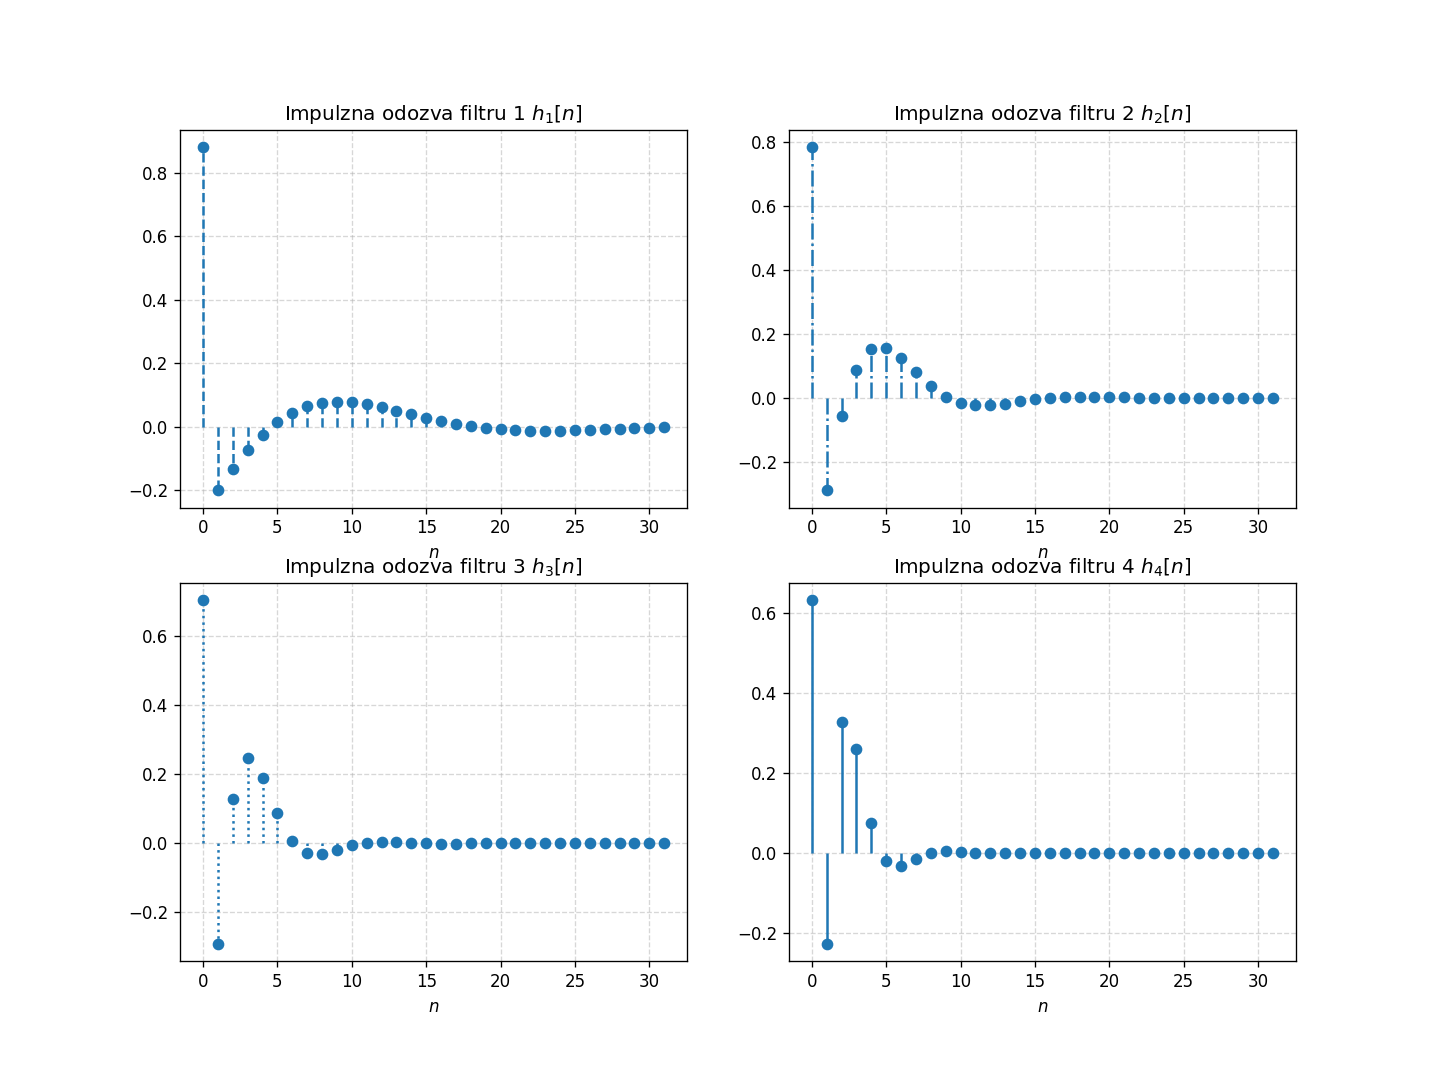

In [17]:
figure, axis = plt.subplots(2, 2, figsize=(12,9))
 
#markerline, stemlines, baseline = plt.stem(x, np.sin(x), markerfmt='o', label='h')
axis[0,0].stem(np.arange(N_imp), h, basefmt=' ', linefmt='--', label='h')
axis[0, 0].set_title("Impulzna odozva filtru 1 $h_{1}[n]$")
axis[0,0].set_xlabel('$n$')
axis[0,0].grid(alpha=0.5, linestyle='--')

axis[0,1].stem(np.arange(N_imp), h2, basefmt=' ', linefmt='-.', label='h2')
axis[0, 1].set_title("Impulzna odozva filtru 2 $h_{2}[n]$")
axis[0,1].set_xlabel('$n$')
axis[0,1].grid(alpha=0.5, linestyle='--')

axis[1,0].stem(np.arange(N_imp), h3, basefmt=' ', linefmt=':', label='h3')
axis[1, 0].set_title("Impulzna odozva filtru 3 $h_{3}[n]$")
axis[1,0].set_xlabel('$n$')
axis[1,0].grid(alpha=0.5, linestyle='--')

axis[1,1].stem(np.arange(N_imp), h4, basefmt=' ', linefmt='-', label='h4')
axis[1, 1].set_title("Impulzna odozva filtru 4 $h_{4}[n]$")
axis[1,1].set_xlabel('$n$')
axis[1,1].grid(alpha=0.5, linestyle='--')
 
#plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
#plt.setp(stemlines, 'linestyle', 'dotted')


plt.show()

<IPython.core.display.Javascript object>


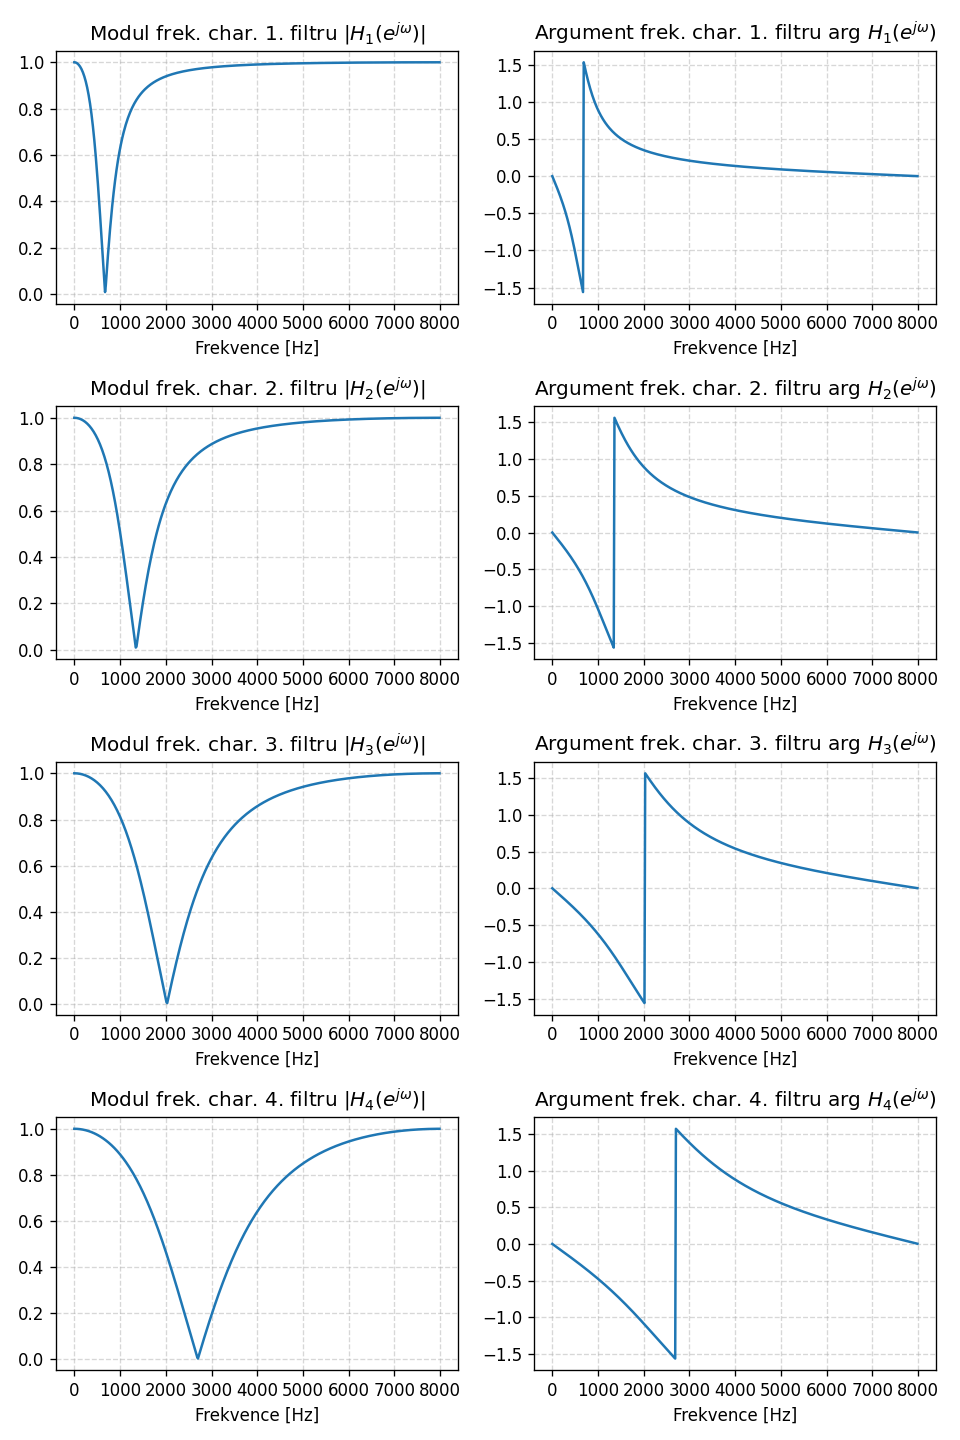

In [18]:
#uloha 9
_, ax = plt.subplots(4, 2, figsize=(8,12))

ax[0,0].plot(w, np.abs(H))
ax[0,0].set_xlabel('Frekvence [Hz]')
ax[0,0].set_title('Modul frek. char. 1. filtru $|H_{1}(e^{j\omega})|$')

ax[0,1].plot(w, np.angle(H))
ax[0,1].set_xlabel('Frekvence [Hz]')
ax[0,1].set_title('Argument frek. char. 1. filtru $\mathrm{arg}\ H_{1}(e^{j\omega})$')


ax[1,0].plot(w2, np.abs(H2))
ax[1,0].set_xlabel('Frekvence [Hz]')
ax[1,0].set_title('Modul frek. char. 2. filtru $|H_{2}(e^{j\omega})|$')

ax[1,1].plot(w2, np.angle(H2))
ax[1,1].set_xlabel('Frekvence [Hz]')
ax[1,1].set_title('Argument frek. char. 2. filtru $\mathrm{arg}\ H_{2}(e^{j\omega})$')



ax[2,0].plot(w3, np.abs(H3))
ax[2,0].set_xlabel('Frekvence [Hz]')
ax[2,0].set_title('Modul frek. char. 3. filtru $|H_{3}(e^{j\omega})|$')

ax[2,1].plot(w3, np.angle(H3))
ax[2,1].set_xlabel('Frekvence [Hz]')
ax[2,1].set_title('Argument frek. char. 3. filtru $\mathrm{arg}\ H_{3}(e^{j\omega})$')



ax[3,0].plot(w4, np.abs(H4))
ax[3,0].set_xlabel('Frekvence [Hz]')
ax[3,0].set_title('Modul frek. char. 4. filtru $|H_{4}(e^{j\omega})|$')

ax[3,1].plot(w4, np.angle(H4))
ax[3,1].set_xlabel('Frekvence [Hz]')
ax[3,1].set_title('Argument frek. char. 4. filtru $\mathrm{arg}\ H_4(e^{j\omega})$')


for axr in ax:
    for ax1 in axr:
        ax1.grid(alpha=0.5, linestyle='--')
        ax1.set_xticks(np.arange(0,max(w2)+1000,1000))

plt.tight_layout()


<IPython.core.display.Javascript object>


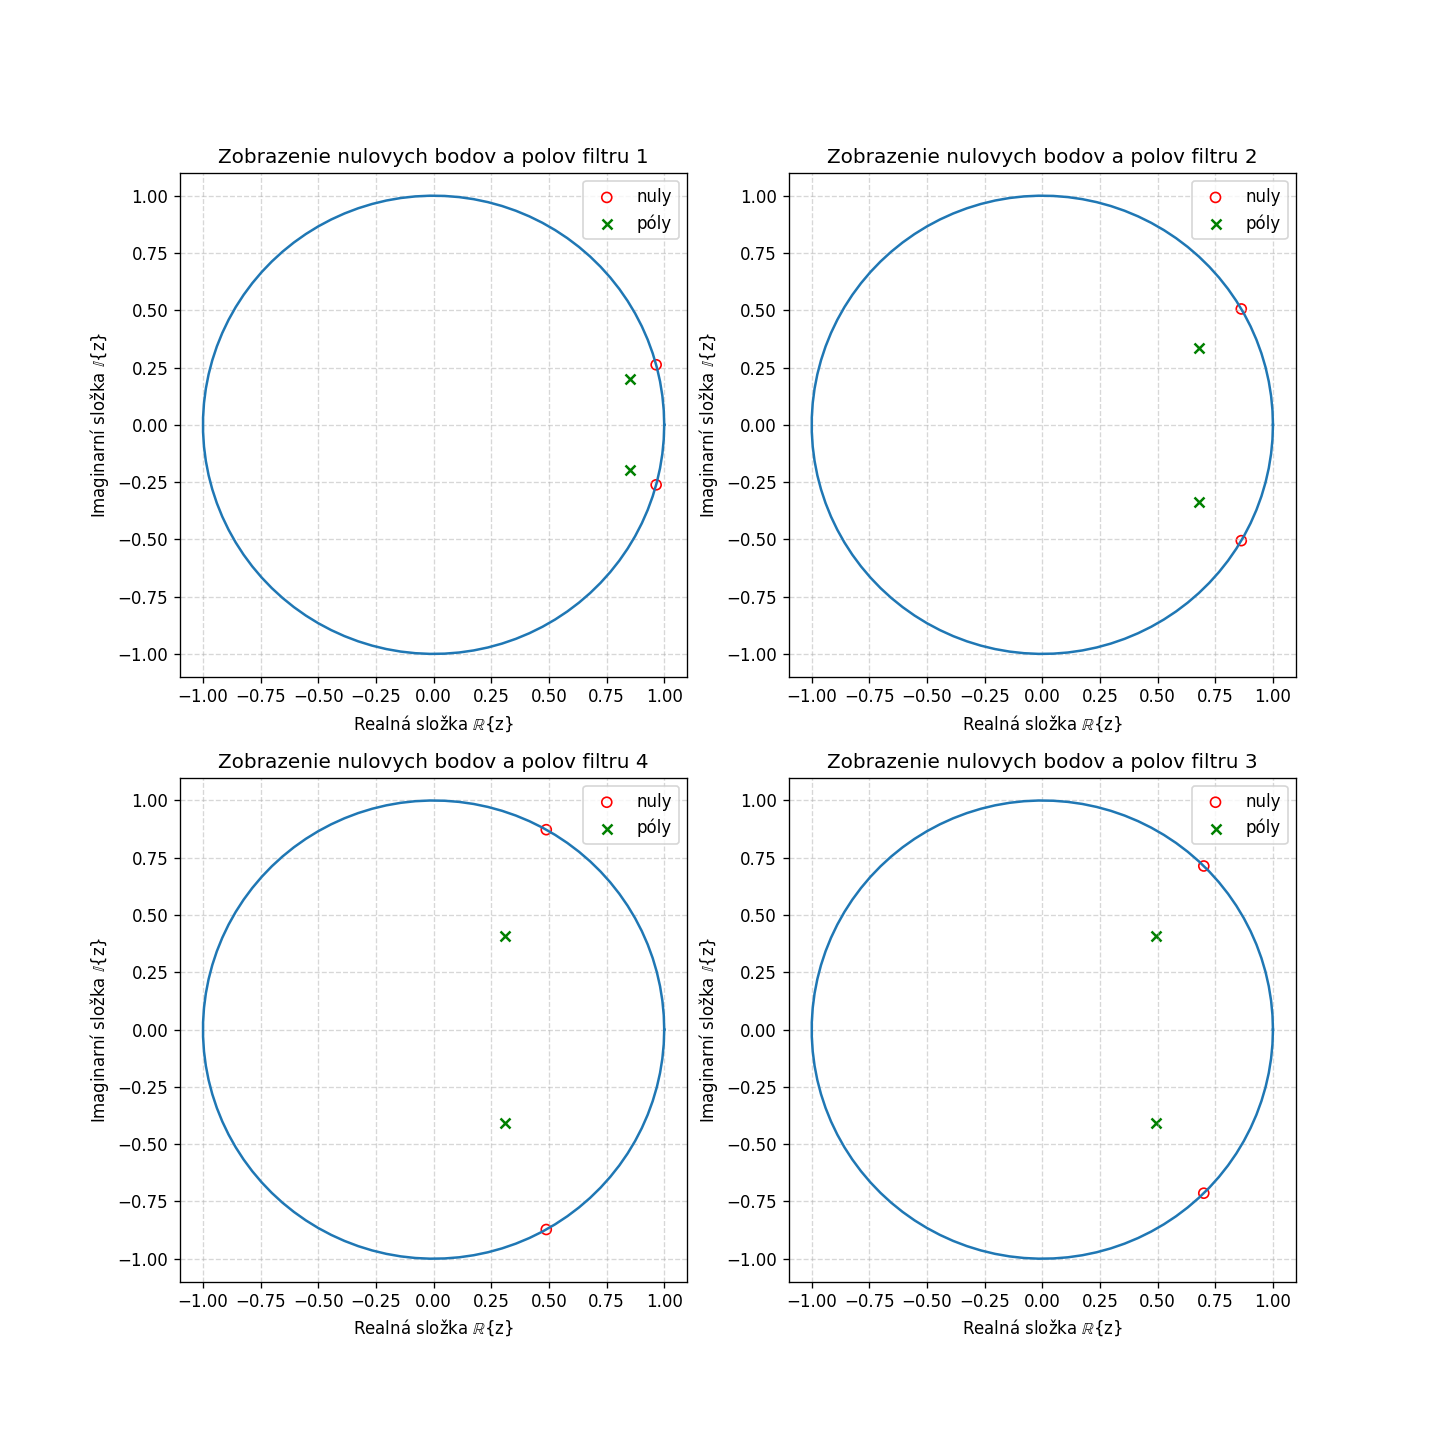

In [19]:
_, ax=plt.subplots(2, 2, figsize=(12,12))

ang = np.linspace(0, 2*np.pi,100)
ax[0,0].plot(np.cos(ang), np.sin(ang))
ax[0,0].scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
ax[0,0].scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
ax[0,0].set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
ax[0,0].set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
ax[0,0].set_title('Zobrazenie nulovych bodov a polov filtru 1')


ax[0,1].plot(np.cos(ang), np.sin(ang))
ax[0,1].scatter(np.real(z2), np.imag(z2), marker='o', facecolors='none', edgecolors='r', label='nuly')
ax[0,1].scatter(np.real(p2), np.imag(p2), marker='x', color='g', label='póly')
ax[0,1].set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
ax[0,1].set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
ax[0,1].set_title('Zobrazenie nulovych bodov a polov filtru 2')


ax[1,1].plot(np.cos(ang), np.sin(ang))
ax[1,1].scatter(np.real(z3), np.imag(z3), marker='o', facecolors='none', edgecolors='r', label='nuly')
ax[1,1].scatter(np.real(p3), np.imag(p3), marker='x', color='g', label='póly')
ax[1,1].set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
ax[1,1].set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
ax[1,1].set_title('Zobrazenie nulovych bodov a polov filtru 3')


ax[1,0].plot(np.cos(ang), np.sin(ang))
ax[1,0].scatter(np.real(z4), np.imag(z4), marker='o', facecolors='none', edgecolors='r', label='nuly')
ax[1,0].scatter(np.real(p4), np.imag(p4), marker='x', color='g', label='póly')
ax[1,0].set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
ax[1,0].set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
ax[1,0].set_title('Zobrazenie nulovych bodov a polov filtru 4')

for axr in ax:
    for ax1 in axr:
        ax1.grid(alpha=0.5, linestyle='--')
        ax1.legend(loc='upper right')


In [20]:
#uloha 10
sf.write("clean_bandstop.wav",vyfil_sig,fs)

<IPython.core.display.Javascript object>


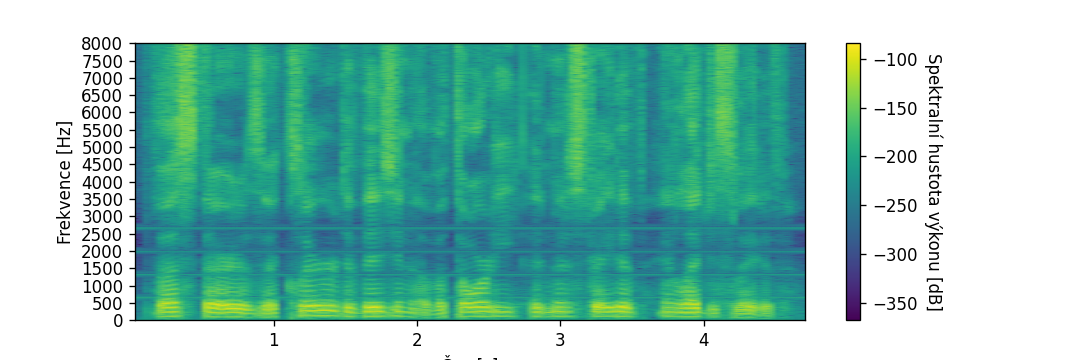

In [21]:
fo, to, sxxo = spectrogram(vyfil_sig,nperseg=N, fs=fs, noverlap=512)
Po = 10 * np.log10(pow(sxxo,2)) 

plt.figure(figsize=(9,3))
plt.yticks(np.arange(0,max(fo)+1,500))
plt.pcolormesh(to,fo,Po,shading='gouraud')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')

cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)


# povodny
IPython.display.display(IPython.display.Audio(data, rate=fs))
# signal rekonstruovany cez filtre
IPython.display.display(IPython.display.Audio(vyfil_sig, rate=fs))

